In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor, plot_importance
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [2]:
# Read in merged_dataset.csv
df = pd.read_csv("merged_dataset.csv")
df

,id,date,covid_overall_concern,covid_activity_impact,covid_behavior_change,covid_concern_self,covid_concern_classmates,covid_concern_family,covid_concern_supplies,feeling_supported,social_media_usage_change,phq4_total_score,current_stress_level,is_ios,sleep_duration_hours,sleep_heathkit_dur,steps_full_day
0,1ff6d7f34acb354430e7323a35ff7703,20200317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1.0,9.00,7.317,181.0
1,1ff6d7f34acb354430e7323a35ff7703,20200320,5.0,7.0,6.0,6.0,4.0,6.0,4.0,2.0,4.0,4.0,3.0,1.0,8.00,7.133,52.0
2,1ff6d7f34acb354430e7323a35ff7703,20200327,6.0,5.0,5.0,4.0,3.0,5.0,3.0,3.0,4.0,4.0,3.0,1.0,8.50,8.500,4.0
3,1ff6d7f34acb354430e7323a35ff7703,20200331,3.0,6.0,4.0,3.0,5.0,5.0,3.0,3.0,3.0,4.0,3.0,1.0,8.25,8.150,20.0
4,1ff6d7f34acb354430e7323a35ff7703,20200410,3.0,4.0,4.0,2.0,2.0,4.0,2.0,4.0,1.0,4.0,2.0,1.0,8.75,8.750,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224985,6b0083d00297f9c03e00b2cde889b666,20191105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11956.0
224986,6b0083d00297f9c03e00b2cde889b666,20191106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14850.0
224987,6b0083d00297f9c03e00b2cde889b666,20191107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6342.0
224988,6b0083d00297f9c03e00b2cde889b666,20191108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13978.0


In [3]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df

,id,date,covid_overall_concern,covid_activity_impact,covid_behavior_change,covid_concern_self,covid_concern_classmates,covid_concern_family,covid_concern_supplies,feeling_supported,social_media_usage_change,phq4_total_score,current_stress_level,is_ios,sleep_duration_hours,sleep_heathkit_dur,steps_full_day
0,1ff6d7f34acb354430e7323a35ff7703,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1.0,9.00,7.317,181.0
1,1ff6d7f34acb354430e7323a35ff7703,2020-03-20,5.0,7.0,6.0,6.0,4.0,6.0,4.0,2.0,4.0,4.0,3.0,1.0,8.00,7.133,52.0
2,1ff6d7f34acb354430e7323a35ff7703,2020-03-27,6.0,5.0,5.0,4.0,3.0,5.0,3.0,3.0,4.0,4.0,3.0,1.0,8.50,8.500,4.0
3,1ff6d7f34acb354430e7323a35ff7703,2020-03-31,3.0,6.0,4.0,3.0,5.0,5.0,3.0,3.0,3.0,4.0,3.0,1.0,8.25,8.150,20.0
4,1ff6d7f34acb354430e7323a35ff7703,2020-04-10,3.0,4.0,4.0,2.0,2.0,4.0,2.0,4.0,1.0,4.0,2.0,1.0,8.75,8.750,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224985,6b0083d00297f9c03e00b2cde889b666,2019-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11956.0
224986,6b0083d00297f9c03e00b2cde889b666,2019-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14850.0
224987,6b0083d00297f9c03e00b2cde889b666,2019-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6342.0
224988,6b0083d00297f9c03e00b2cde889b666,2019-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13978.0


In [4]:
# Record the date that separate pre and during Covid
date_split = pd.to_datetime("2020-03-11")

In [5]:
# Impute sleep data

# Initialize a copy
df_filtered = df.copy()

# Replace 0 with 0.1 in 'sleep_duration_hours' and 'sleep_heathkit_dur'
df['sleep_duration_hours'] = df['sleep_duration_hours'].replace(0, 0.1)
df['sleep_heathkit_dur'] = df['sleep_heathkit_dur'].replace(0, 0.1)

# Step 1: Calculate fold difference and absolute hour difference, ignoring NaNs
df['fold_difference'] = df.apply(
    lambda row: max(row['sleep_duration_hours'], row['sleep_heathkit_dur']) / min(row['sleep_duration_hours'], row['sleep_heathkit_dur']) 
    if pd.notna(row['sleep_duration_hours']) and pd.notna(row['sleep_heathkit_dur']) else None, axis=1
)

df['hour_difference'] = df.apply(
    lambda row: abs(row['sleep_duration_hours'] - row['sleep_heathkit_dur']) 
    if pd.notna(row['sleep_duration_hours']) and pd.notna(row['sleep_heathkit_dur']) else None, axis=1
)

# Step 2: Set values in both sleep columns to NaN if they don't pass the filter criteria
def filter_sleep_values(row):
    if pd.notna(row['fold_difference']) and row['fold_difference'] > 1.5 and \
       pd.notna(row['hour_difference']) and row['hour_difference'] > 2:
        return pd.Series([np.nan, np.nan])
    else:
        return pd.Series([row['sleep_duration_hours'], row['sleep_heathkit_dur']])

df_filtered[['sleep_duration_hours', 'sleep_heathkit_dur']] = df.apply(filter_sleep_values, axis=1)

df_filtered = df_filtered.iloc[:, :-2]
df_filtered

,id,date,covid_overall_concern,covid_activity_impact,covid_behavior_change,covid_concern_self,covid_concern_classmates,covid_concern_family,covid_concern_supplies,feeling_supported,social_media_usage_change,phq4_total_score,current_stress_level,is_ios,sleep_duration_hours
0,1ff6d7f34acb354430e7323a35ff7703,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1.0,9.00
1,1ff6d7f34acb354430e7323a35ff7703,2020-03-20,5.0,7.0,6.0,6.0,4.0,6.0,4.0,2.0,4.0,4.0,3.0,1.0,8.00
2,1ff6d7f34acb354430e7323a35ff7703,2020-03-27,6.0,5.0,5.0,4.0,3.0,5.0,3.0,3.0,4.0,4.0,3.0,1.0,8.50
3,1ff6d7f34acb354430e7323a35ff7703,2020-03-31,3.0,6.0,4.0,3.0,5.0,5.0,3.0,3.0,3.0,4.0,3.0,1.0,8.25
4,1ff6d7f34acb354430e7323a35ff7703,2020-04-10,3.0,4.0,4.0,2.0,2.0,4.0,2.0,4.0,1.0,4.0,2.0,1.0,8.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224985,6b0083d00297f9c03e00b2cde889b666,2019-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224986,6b0083d00297f9c03e00b2cde889b666,2019-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224987,6b0083d00297f9c03e00b2cde889b666,2019-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224988,6b0083d00297f9c03e00b2cde889b666,2019-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Calculate daily mean and standard deviation across all students
filtered_daily_sleep = df_filtered.groupby(['date', 'id'])['sleep_duration_hours'].mean().reset_index()
filtered_sleep_stats = filtered_daily_sleep.groupby('date')['sleep_duration_hours'].agg(['mean', 'std']).reset_index()

# Identify dates that have a mean sleep hour being more than 9 more less than 6
# These dates likely contain error, as they appear as outliers during pre-processing
invalid_dates = filtered_sleep_stats[(filtered_sleep_stats['mean'] < 6) | (filtered_sleep_stats['mean'] > 9)]['date']

# Set sleep_duration_hours and sleep_heathkit_dur to NaN for rows with invalid dates
df_filtered.loc[df_filtered['date'].isin(invalid_dates), ['sleep_duration_hours', 'sleep_heathkit_dur']] = pd.NA

In [7]:
# Impute NA data

# Remove rows that contain no information
columns_to_check = list(range(2, 10)) + [12] + list(range(14, 16))

df_filtered = df_filtered[~(
    df_filtered.iloc[:, columns_to_check].isna().all(axis=1) &
    (df_filtered.iloc[:, 11].isna() | (df_filtered.iloc[:, 11] == 0))
)]

# Add information related to semesters

# A dictionary with the last days of classes for each semester
# This information is not yet used
last_days = {
    2017: ['2017-08-23', '2017-11-14'],
    2018: ['2018-03-06', '2018-05-30', '2018-08-22', '2018-11-13'],
    2019: ['2019-03-06', '2019-08-21', '2019-11-22'],
    2020: ['2020-03-06', '2020-06-03', '2020-08-26', '2020-11-17'],
    2021: ['2021-03-10', '2021-06-02', '2021-08-25', '2021-11-16'],
    2022: ['2022-03-08', '2022-06-01', '2022-08-24', '2022-11-15']
}

# Another dictionary listing the spring and fall semester dates
date_ranges = [
    ("2017-09-11", "2017-11-22"),
    ("2018-01-03", "2018-03-13"),
    ("2018-03-26", "2018-06-05"),
    ("2018-09-12", "2018-11-21"),
    ("2019-01-03", "2019-03-13"),
    ("2019-03-25", "2019-06-04"),
    ("2019-09-16", "2019-11-27"),
    ("2020-01-06", "2020-03-13"),
    ("2020-03-30", "2020-06-09"),
    ("2020-09-14", "2020-12-04"),
    ("2021-01-07", "2021-03-17"),
    ("2021-03-29", "2021-06-08"),
    ("2021-09-13", "2021-11-24"),
    ("2022-01-04", "2022-03-15"),
    ("2022-03-28", "2022-06-07"),
    ("2022-09-12", "2022-11-23")
]

date_ranges = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in date_ranges]

# Function to check if a date is within any of the specified date ranges
def is_break(date):
    return not any(start <= date <= end for start, end in date_ranges)

# Add the "is_break" column to the general DataFrame
df_filtered['is_break'] = df_filtered['date'].apply(is_break)

df_filtered

/var/folders/1t/x3hxchcn2cz0_zmcqsjzjwm00000gn/T/ipykernel_88505/2786813761.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['is_break'] = df_filtered['date'].apply(is_break)


,id,date,covid_overall_concern,covid_activity_impact,covid_behavior_change,covid_concern_self,covid_concern_classmates,covid_concern_family,covid_concern_supplies,feeling_supported,social_media_usage_change,phq4_total_score,current_stress_level,is_ios,sleep_duration_hours,sleep_heathkit_dur,is_break
0,1ff6d7f34acb354430e7323a35ff7703,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1.0,9.00,NaN,True
1,1ff6d7f34acb354430e7323a35ff7703,2020-03-20,5.0,7.0,6.0,6.0,4.0,6.0,4.0,2.0,4.0,4.0,3.0,1.0,8.00,NaN,True
2,1ff6d7f34acb354430e7323a35ff7703,2020-03-27,6.0,5.0,5.0,4.0,3.0,5.0,3.0,3.0,4.0,4.0,3.0,1.0,8.50,NaN,True
3,1ff6d7f34acb354430e7323a35ff7703,2020-03-31,3.0,6.0,4.0,3.0,5.0,5.0,3.0,3.0,3.0,4.0,3.0,1.0,8.25,NaN,False
4,1ff6d7f34acb354430e7323a35ff7703,2020-04-10,3.0,4.0,4.0,2.0,2.0,4.0,2.0,4.0,1.0,4.0,2.0,1.0,8.75,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217158,8e12cde03a0eaf1a9c41596a81a1cf59,2020-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.00,NaN,False
217159,8e12cde03a0eaf1a9c41596a81a1cf59,2020-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.50,NaN,False
217160,8e12cde03a0eaf1a9c41596a81a1cf59,2020-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.75,NaN,False
217161,8e12cde03a0eaf1a9c41596a81a1cf59,2020-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.00,NaN,False


In [8]:
# Impute missing values in 'sleep_heathkit_dur' with 'sleep_duration_hours'
df_filtered['sleep_heathkit_dur'].fillna(df_filtered['sleep_duration_hours'], inplace=True)

# Check if there are any remaining missing values
print("Remaining missing values in sleep_heathkit_dur after imputation:")
print(df_filtered['sleep_heathkit_dur'].isna().sum())

Remaining missing values in sleep_heathkit_dur after imputation:
3480


/var/folders/1t/x3hxchcn2cz0_zmcqsjzjwm00000gn/T/ipykernel_88505/2785408625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sleep_heathkit_dur'].fillna(df_filtered['sleep_duration_hours'], inplace=True)


In [9]:
df_filtered

,id,date,covid_overall_concern,covid_activity_impact,covid_behavior_change,covid_concern_self,covid_concern_classmates,covid_concern_family,covid_concern_supplies,feeling_supported,social_media_usage_change,phq4_total_score,current_stress_level,is_ios,sleep_duration_hours,sleep_heathkit_dur,is_break
0,1ff6d7f34acb354430e7323a35ff7703,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1.0,9.00,9.00,True
1,1ff6d7f34acb354430e7323a35ff7703,2020-03-20,5.0,7.0,6.0,6.0,4.0,6.0,4.0,2.0,4.0,4.0,3.0,1.0,8.00,8.00,True
2,1ff6d7f34acb354430e7323a35ff7703,2020-03-27,6.0,5.0,5.0,4.0,3.0,5.0,3.0,3.0,4.0,4.0,3.0,1.0,8.50,8.50,True
3,1ff6d7f34acb354430e7323a35ff7703,2020-03-31,3.0,6.0,4.0,3.0,5.0,5.0,3.0,3.0,3.0,4.0,3.0,1.0,8.25,8.25,False
4,1ff6d7f34acb354430e7323a35ff7703,2020-04-10,3.0,4.0,4.0,2.0,2.0,4.0,2.0,4.0,1.0,4.0,2.0,1.0,8.75,8.75,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217158,8e12cde03a0eaf1a9c41596a81a1cf59,2020-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.00,7.00,False
217159,8e12cde03a0eaf1a9c41596a81a1cf59,2020-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.50,8.50,False
217160,8e12cde03a0eaf1a9c41596a81a1cf59,2020-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.75,6.75,False
217161,8e12cde03a0eaf1a9c41596a81a1cf59,2020-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.00,5.00,False


In [10]:
# Check the number of rows removed
print(f"Rows before filtering: {df.shape[0]}")
print(f"Rows after filtering: {df_filtered.shape[0]}")

# Check how many rows have 'is_break' as True or False
print(df_filtered['is_break'].value_counts())

Rows before filtering: 224990
Rows after filtering: 198662
is_break
False    122972
True      75690
Name: count, dtype: int64


In [11]:
# Splitting the dataset

# Split the dataset into pre-COVID and during-COVID
pre_covid = df_filtered[df_filtered['date'] < date_split]
dur_covid = df_filtered[df_filtered['date'] >= date_split]

print(f"Pre-COVID rows: {pre_covid.shape[0]}")
print(f"During-COVID rows: {dur_covid.shape[0]}")
print(f"Total rows: {pre_covid.shape[0] + dur_covid.shape[0]}")
print(f"Original rows: {df_filtered.shape[0]}")

Pre-COVID rows: 111138
During-COVID rows: 87524
Total rows: 198662
Original rows: 198662


In [12]:
print("Pre-COVID date range:", pre_covid['date'].min(), "-", pre_covid['date'].max())
print("During-COVID date range:", dur_covid['date'].min(), "-", dur_covid['date'].max())

Pre-COVID date range: 2017-09-07 00:00:00 - 2020-03-10 00:00:00
During-COVID date range: 2020-03-11 00:00:00 - 2022-07-02 00:00:00


In [13]:
overlap = pd.merge(pre_covid, dur_covid, on=['id', 'date'], how='inner')
print(f"Overlap rows: {overlap.shape[0]}")

Overlap rows: 0


In [14]:
pre_covid.to_csv("pre_covid.csv", index=False)
dur_covid.to_csv("dur_covid.csv", index=False)

In [15]:
# Average sleep duration
print("Average sleep pre-COVID:", pre_covid['sleep_duration_hours'].mean())
print("Average sleep during-COVID:", dur_covid['sleep_duration_hours'].mean())

# Average stress level
print("Average stress pre-COVID:", pre_covid['current_stress_level'].mean())
print("Average stress during-COVID:", dur_covid['current_stress_level'].mean())

Average sleep pre-COVID: 7.4175238086491735
Average sleep during-COVID: 7.58055780886051
Average stress pre-COVID: 2.4427057271528
Average stress during-COVID: 2.647961092405537


### Interpretation of Average Sleep and Stress
Sleep Duration:

Pre-COVID average: 7.42 hours.
During-COVID average: 7.58 hours.
This suggests a modest increase in sleep duration during COVID, which aligns with early-pandemic reports of people sleeping more due to reduced commuting and social obligations.


Stress Levels:

Pre-COVID average: 2.44.
During-COVID average: 2.65.
Stress levels increased during COVID, possibly reflecting uncertainty and health concerns associated with the pandemic.

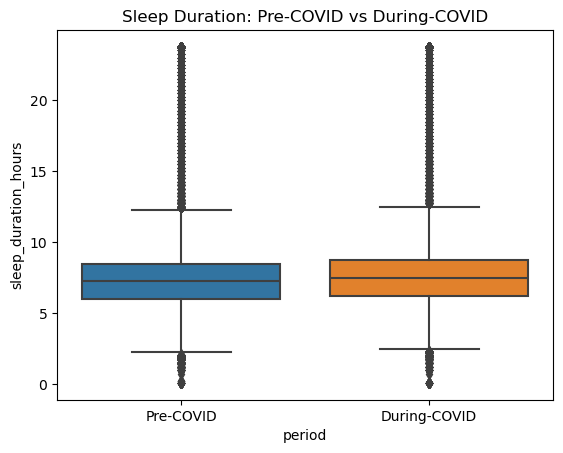

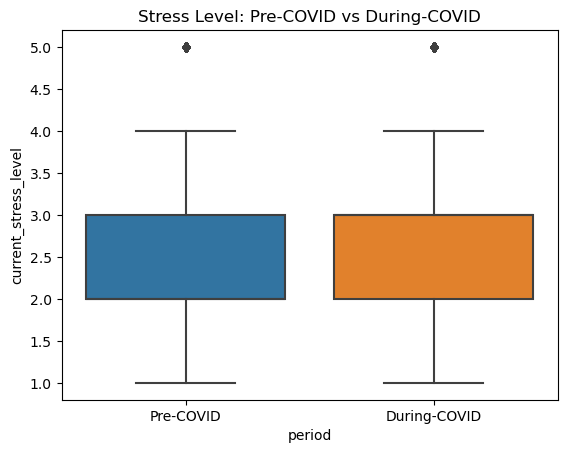

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the datasets for visualization
combined = pd.concat([pre_covid.assign(period="Pre-COVID"), dur_covid.assign(period="During-COVID")])

# Sleep duration comparison
sns.boxplot(data=combined, x="period", y="sleep_duration_hours")
plt.title("Sleep Duration: Pre-COVID vs During-COVID")
plt.show()

# Stress level comparison
sns.boxplot(data=combined, x="period", y="current_stress_level")
plt.title("Stress Level: Pre-COVID vs During-COVID")
plt.show()

### Interpretation of Boxplots: Pre-COVID vs During-COVID
#### Sleep Duration
The boxplots show that:
Median sleep duration during COVID is slightly higher than pre-COVID.
Variability (interquartile range) is similar in both periods.
Outliers in sleep duration exist in both periods but seem more pronounced during COVID.

#### Stress Levels
The stress level boxplots show:
A slight increase in median stress levels during COVID compared to pre-COVID.
Less variability during COVID compared to pre-COVID, with fewer extreme outliers.

/var/folders/1t/x3hxchcn2cz0_zmcqsjzjwm00000gn/T/ipykernel_88505/3994536938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid['month'] = pre_covid['date'].dt.to_period('M')
/var/folders/1t/x3hxchcn2cz0_zmcqsjzjwm00000gn/T/ipykernel_88505/3994536938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dur_covid['month'] = dur_covid['date'].dt.to_period('M')


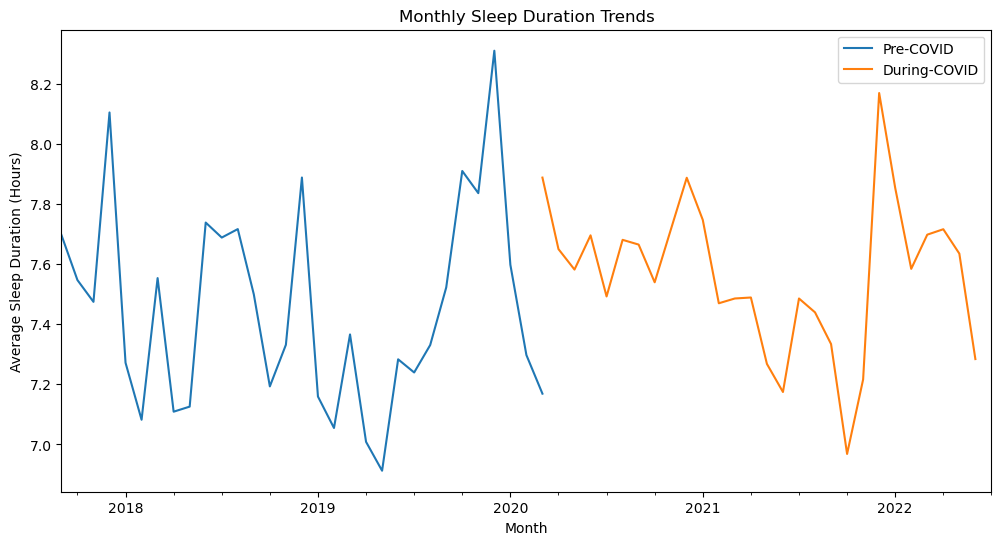

In [17]:
# Add week or month columns
pre_covid['month'] = pre_covid['date'].dt.to_period('M')
dur_covid['month'] = dur_covid['date'].dt.to_period('M')

# Group by month
pre_trends = pre_covid.groupby('month')['sleep_duration_hours'].mean()
dur_trends = dur_covid.groupby('month')['sleep_duration_hours'].mean()

# Plot trends
plt.figure(figsize=(12, 6))
pre_trends.plot(label="Pre-COVID", legend=True)
dur_trends.plot(label="During-COVID", legend=True)
plt.title("Monthly Sleep Duration Trends")
plt.xlabel("Month")
plt.ylabel("Average Sleep Duration (Hours)")
plt.show()


/var/folders/1t/x3hxchcn2cz0_zmcqsjzjwm00000gn/T/ipykernel_88505/4111793963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid['month'] = pre_covid['date'].dt.to_period('M')
/var/folders/1t/x3hxchcn2cz0_zmcqsjzjwm00000gn/T/ipykernel_88505/4111793963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dur_covid['month'] = dur_covid['date'].dt.to_period('M')


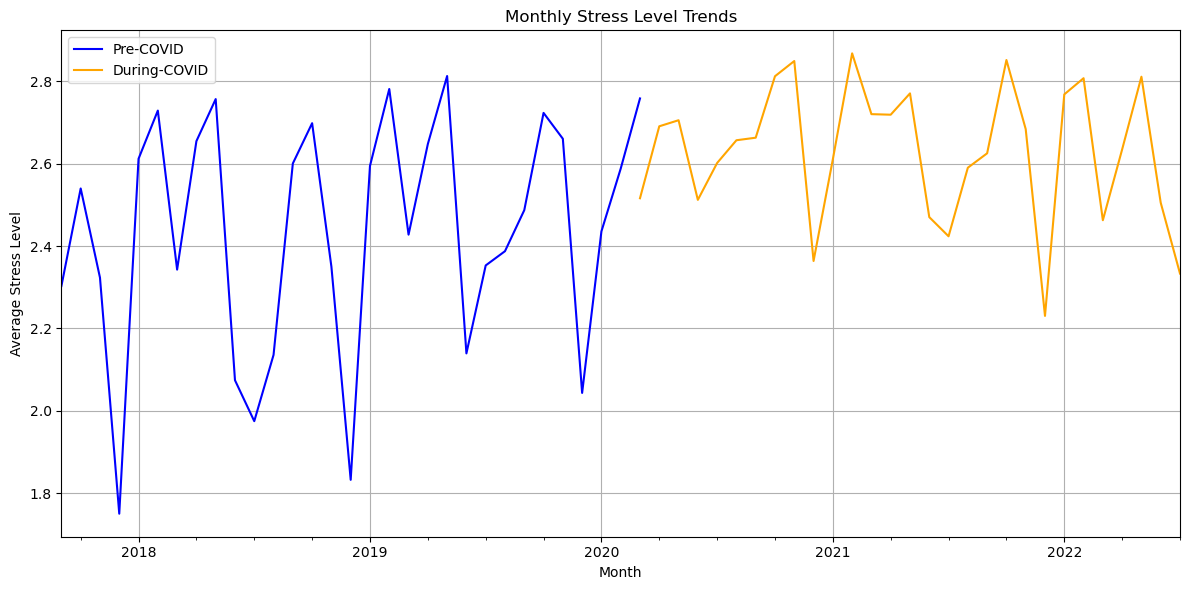

In [18]:
# Ensure the 'month' column is properly formatted in both datasets
pre_covid['month'] = pre_covid['date'].dt.to_period('M')
dur_covid['month'] = dur_covid['date'].dt.to_period('M')

# Group by month and calculate average stress levels
pre_covid_stress_trends = pre_covid.groupby('month')['current_stress_level'].mean()
dur_covid_stress_trends = dur_covid.groupby('month')['current_stress_level'].mean()

# Plot trends
plt.figure(figsize=(12, 6))
pre_covid_stress_trends.plot(label="Pre-COVID", legend=True, color='blue', linestyle='-')
dur_covid_stress_trends.plot(label="During-COVID", legend=True, color='orange', linestyle='-')
plt.title("Monthly Stress Level Trends")
plt.xlabel("Month")
plt.ylabel("Average Stress Level")
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
# Pre-COVID correlation
print("Pre-COVID Correlation:")
print(pre_covid[['sleep_duration_hours', 'current_stress_level']].corr())

# During-COVID correlation
print("During-COVID Correlation:")
print(dur_covid[['sleep_duration_hours', 'current_stress_level']].corr())

Pre-COVID Correlation:
                      sleep_duration_hours  current_stress_level
sleep_duration_hours              1.000000             -0.066252
current_stress_level             -0.066252              1.000000
During-COVID Correlation:
                      sleep_duration_hours  current_stress_level
sleep_duration_hours              1.000000             -0.123893
current_stress_level             -0.123893              1.000000


### Correlation Analysis

#### Pre-COVID:
Correlation between sleep_duration_hours and current_stress_level: -0.066.
Weak negative correlation suggests that higher sleep duration was slightly associated with lower stress levels pre-COVID.

#### During-COVID:
Correlation between sleep_duration_hours and current_stress_level: -0.124.
The stronger negative correlation indicates that during COVID, sleep played a slightly more significant role in reducing stress levels.

/var/folders/1t/x3hxchcn2cz0_zmcqsjzjwm00000gn/T/ipykernel_88505/281600184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid['month_num'] = pre_covid['date'].dt.month
/var/folders/1t/x3hxchcn2cz0_zmcqsjzjwm00000gn/T/ipykernel_88505/281600184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dur_covid['month_num'] = dur_covid['date'].dt.month


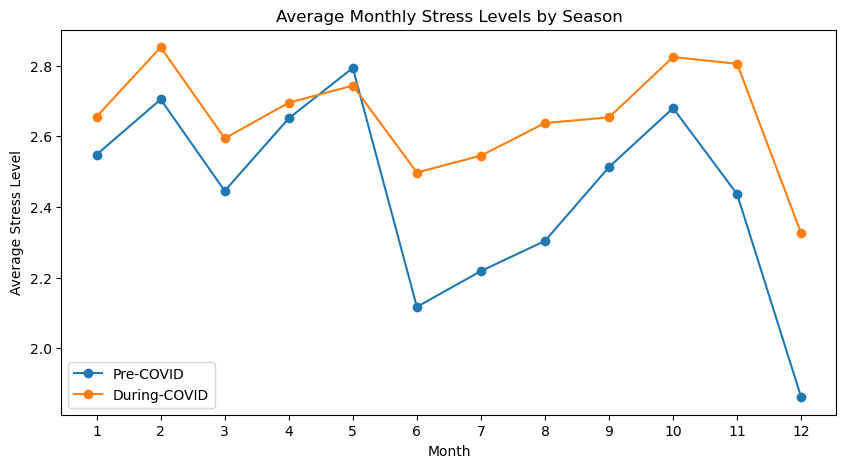

In [20]:
pre_covid['month_num'] = pre_covid['date'].dt.month
dur_covid['month_num'] = dur_covid['date'].dt.month
seasonal_stress_pre = pre_covid.groupby('month_num')['current_stress_level'].mean()
seasonal_stress_dur = dur_covid.groupby('month_num')['current_stress_level'].mean()

plt.figure(figsize=(10, 5))
plt.plot(seasonal_stress_pre, label='Pre-COVID', marker='o')
plt.plot(seasonal_stress_dur, label='During-COVID', marker='o')
plt.title("Average Monthly Stress Levels by Season")
plt.xlabel("Month")
plt.ylabel("Average Stress Level")
plt.xticks(range(1, 13))
plt.legend()
plt.show()


### Interpretation of Monthly Stress Levels by Season

#### Pre-COVID Trends:

Stress levels fluctuate significantly, peaking around February and May and dropping in June and December.
These peaks could align with academic pressures like midterms, finals, or deadlines.

### During-COVID Trends:

Stress levels are consistently higher than pre-COVID for most months.
Peaks are observed in February, May, and October-November, with a notable drop in December.
The overall trend is less erratic than pre-COVID, possibly reflecting continuous pandemic-related stress rather than academic seasonality.

In [21]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(pre_covid['current_stress_level'], dur_covid['current_stress_level'], nan_policy='omit')
print(f"T-test: t-statistic={t_stat}, p-value={p_val}")

T-test: t-statistic=-17.15761486265708, p-value=1.0184342529734132e-65


### T-Test Results

T-Statistic: -17.16
P-Value: 1.018e-65

The extremely small p-value indicates a statistically significant difference between pre-COVID and during-COVID stress levels.

This confirms that the increase in stress during COVID is not random but likely due to factors tied to the pandemic.

In [22]:
print("Correlation between sleep and stress (Pre-COVID):", pre_covid[['sleep_duration_hours', 'current_stress_level']].corr())
print("Correlation between sleep and stress (During-COVID):", dur_covid[['sleep_duration_hours', 'current_stress_level']].corr())

Correlation between sleep and stress (Pre-COVID):                       sleep_duration_hours  current_stress_level
sleep_duration_hours              1.000000             -0.066252
current_stress_level             -0.066252              1.000000
Correlation between sleep and stress (During-COVID):                       sleep_duration_hours  current_stress_level
sleep_duration_hours              1.000000             -0.123893
current_stress_level             -0.123893              1.000000


### Correlation Between Sleep and Stress
Pre-COVID Correlation: -0.066

Weak negative correlation: higher sleep duration slightly reduces stress but not significantly.
During-COVID Correlation: -0.124

Slightly stronger negative correlation: during COVID, getting more sleep appears to be more important in reducing stress.

### Insights to Highlight

#### Stress Increased During COVID:

Both monthly trends and statistical testing support this finding.
The increase may be due to external uncertainties, health concerns, and social disruptions.

#### Seasonal Stress Patterns Persist:

Even during COVID, peaks in stress align with common academic stressors, though the magnitude is higher.
Sleep Plays a Bigger Role During COVID:

The stronger negative correlation during COVID suggests that better sleep hygiene may have been a key strategy to manage stress.

In [23]:
import pandas as pd

# Load pre-COVID and during-COVID data
pre_covid = pd.read_csv("pre_covid.csv")
dur_covid = pd.read_csv("dur_covid.csv")


In [24]:
print(f"Remaining rows in pre_covid: {len(pre_covid)}")
print(f"Remaining rows in dur_covid: {len(dur_covid)}")

Remaining rows in pre_covid: 111138
Remaining rows in dur_covid: 87524


In [25]:
pre_covid

,id,date,covid_overall_concern,covid_activity_impact,covid_behavior_change,covid_concern_self,covid_concern_classmates,covid_concern_family,covid_concern_supplies,feeling_supported,social_media_usage_change,phq4_total_score,current_stress_level,is_ios,sleep_duration_hours,sleep_heathkit_dur,is_break
0,1ff6d7f34acb354430e7323a35ff7703,2017-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1.0,1.0,NaN,NaN,True
1,1ff6d7f34acb354430e7323a35ff7703,2017-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1.0,NaN,NaN,True
2,1ff6d7f34acb354430e7323a35ff7703,2017-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.50,8.50,True
3,1ff6d7f34acb354430e7323a35ff7703,2017-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.75,8.75,True
4,1ff6d7f34acb354430e7323a35ff7703,2017-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1.0,9.25,9.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111133,6b0083d00297f9c03e00b2cde889b666,2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.75,10.75,False
111134,6b0083d00297f9c03e00b2cde889b666,2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,1.0,9.25,9.25,False
111135,6b0083d00297f9c03e00b2cde889b666,2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,1.0,9.50,9.50,False
111136,6b0083d00297f9c03e00b2cde889b666,2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.25,7.25,False


In [26]:
# Identify numeric and boolean columns
numeric_columns = ['feeling_supported', 'social_media_usage_change', 'phq4_total_score', 
                   'current_stress_level', 'sleep_duration_hours', 'sleep_heathkit_dur']

# Check which columns were excluded during imputation
excluded_columns = [col for col in numeric_columns if col not in pre_covid.columns]
print("Excluded columns:", excluded_columns)

# Check for all-NaN columns
all_nan_columns = pre_covid[numeric_columns].isna().all()
print("Columns with all NaN values:")
print(all_nan_columns[all_nan_columns])

# Drop or fill all-NaN columns
for col in all_nan_columns[all_nan_columns].index:
    pre_covid[col].fillna(0, inplace=True)  # Or drop if appropriate

# Re-run imputation
numeric_imputer = SimpleImputer(strategy='mean')
numeric_imputed = numeric_imputer.fit_transform(pre_covid[numeric_columns])

# Check new shape
print(f"Shape of numeric_imputed: {numeric_imputed.shape}")
print(f"Length of numeric_columns: {len(numeric_columns)}")

# Assign back to DataFrame
pre_covid[numeric_columns] = pd.DataFrame(
    numeric_imputed, columns=numeric_columns, index=pre_covid.index
)


# Verify remaining missing values
print("Remaining missing values:")
print(pre_covid.isna().sum())



Excluded columns: []
Columns with all NaN values:
feeling_supported            True
social_media_usage_change    True
dtype: bool
Shape of numeric_imputed: (111138, 6)
Length of numeric_columns: 6
Remaining missing values:
id                                0
date                              0
covid_overall_concern        111138
covid_activity_impact        111138
covid_behavior_change        111138
covid_concern_self           111138
covid_concern_classmates     111138
covid_concern_family         111138
covid_concern_supplies       111138
feeling_supported                 0
social_media_usage_change         0
phq4_total_score                  0
current_stress_level              0
is_ios                            0
sleep_duration_hours              0
sleep_heathkit_dur                0
is_break                          0
dtype: int64


In [27]:
dur_covid

,id,date,covid_overall_concern,covid_activity_impact,covid_behavior_change,covid_concern_self,covid_concern_classmates,covid_concern_family,covid_concern_supplies,feeling_supported,social_media_usage_change,phq4_total_score,current_stress_level,is_ios,sleep_duration_hours,sleep_heathkit_dur,is_break
0,1ff6d7f34acb354430e7323a35ff7703,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1.0,9.00,9.00,True
1,1ff6d7f34acb354430e7323a35ff7703,2020-03-20,5.0,7.0,6.0,6.0,4.0,6.0,4.0,2.0,4.0,4.0,3.0,1.0,8.00,8.00,True
2,1ff6d7f34acb354430e7323a35ff7703,2020-03-27,6.0,5.0,5.0,4.0,3.0,5.0,3.0,3.0,4.0,4.0,3.0,1.0,8.50,8.50,True
3,1ff6d7f34acb354430e7323a35ff7703,2020-03-31,3.0,6.0,4.0,3.0,5.0,5.0,3.0,3.0,3.0,4.0,3.0,1.0,8.25,8.25,False
4,1ff6d7f34acb354430e7323a35ff7703,2020-04-10,3.0,4.0,4.0,2.0,2.0,4.0,2.0,4.0,1.0,4.0,2.0,1.0,8.75,8.75,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87519,8e12cde03a0eaf1a9c41596a81a1cf59,2020-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.00,7.00,False
87520,8e12cde03a0eaf1a9c41596a81a1cf59,2020-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.50,8.50,False
87521,8e12cde03a0eaf1a9c41596a81a1cf59,2020-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.75,6.75,False
87522,8e12cde03a0eaf1a9c41596a81a1cf59,2020-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.00,5.00,False


In [28]:
# Identify numeric and boolean columns
numeric_columns = ['covid_overall_concern', 'covid_activity_impact',
       'covid_behavior_change', 'covid_concern_self',
       'covid_concern_classmates', 'covid_concern_family',
       'covid_concern_supplies', 'feeling_supported',
       'social_media_usage_change', 'phq4_total_score', 'current_stress_level',
       'is_ios', 'sleep_duration_hours', 'sleep_heathkit_dur', 'is_break']

# Check which columns were excluded during imputation
excluded_columns = [col for col in numeric_columns if col not in dur_covid.columns]
print("Excluded columns:", excluded_columns)

# Check for all-NaN columns
all_nan_columns = dur_covid[numeric_columns].isna().all()
print("Columns with all NaN values:")
print(all_nan_columns[all_nan_columns])

# Drop or fill all-NaN columns
for col in all_nan_columns[all_nan_columns].index:
    dur_covid[col].fillna(0, inplace=True)  # Replace NaNs with 0 or drop

# Re-run imputation
from sklearn.impute import SimpleImputer
numeric_imputer = SimpleImputer(strategy='mean')
numeric_imputed = numeric_imputer.fit_transform(dur_covid[numeric_columns])

# Check new shape
print(f"Shape of numeric_imputed: {numeric_imputed.shape}")
print(f"Length of numeric_columns: {len(numeric_columns)}")

# Assign back to DataFrame
dur_covid[numeric_columns] = pd.DataFrame(
    numeric_imputed, columns=numeric_columns, index=dur_covid.index
)

# Verify remaining missing values
print("Remaining missing values:")
print(dur_covid.isna().sum())

Excluded columns: []
Columns with all NaN values:
Series([], dtype: bool)
Shape of numeric_imputed: (87524, 15)
Length of numeric_columns: 15
Remaining missing values:
id                           0
date                         0
covid_overall_concern        0
covid_activity_impact        0
covid_behavior_change        0
covid_concern_self           0
covid_concern_classmates     0
covid_concern_family         0
covid_concern_supplies       0
feeling_supported            0
social_media_usage_change    0
phq4_total_score             0
current_stress_level         0
is_ios                       0
sleep_duration_hours         0
sleep_heathkit_dur           0
is_break                     0
dtype: int64


In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def xgboost_regression(X, y, params, test_size=0.2, eval_size=0.1, tree_method="hist", verbose=False):
    """
    A function to perform XGBoost regression with training, evaluation, and test sets.

    Parameters:
    - X: Features (numpy array or pandas DataFrame).
    - y: Target (numpy array or pandas Series).
    - params: Dictionary of XGBoost hyperparameters.
    - test_size: Fraction of data to use for testing (default: 0.2).
    - eval_size: Fraction of test data to use for evaluation (default: 0.1).
    - tree_method: Tree building method for XGBoost (default: "hist").
    - verbose: Whether to print evaluation metrics during training (default: False).

    Returns:
    - model: Trained XGBoost model.
    """
    # Split the data into training and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Split the temporary set into evaluation and test sets
    eval_size_relative = eval_size / (1 - test_size)  # Adjust eval size to relative fraction of the remaining data
    X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=eval_size_relative, random_state=42)

    print(f"Training set size: {len(X_train)}")
    print(f"Validation set size: {len(X_eval)}")
    print(f"Test set size: {len(X_test)}")
    
    # Initialize the XGBoost model
    model = xgb.XGBRegressor(
        **params,
        tree_method=tree_method
    )
    
    # Train the model using only the training data
    model.fit(X_train, y_train, verbose=verbose)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R-squared score
    
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    
    # Residuals plot
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
    plt.xlabel("True Values")
    plt.ylabel("Residuals")
    plt.title("Residuals Plot")
    plt.show()

    # Residuals histogram
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=30, alpha=0.7)
    plt.title("Histogram of Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()
    
    return model


In [30]:
# Display the columns in pre_covid
print("Columns in pre_covid dataset:")
print(pre_covid.columns)

features_pre = pre_covid.columns
features_pre

Columns in pre_covid dataset:
Index(['id', 'date', 'covid_overall_concern', 'covid_activity_impact',
       'covid_behavior_change', 'covid_concern_self',
       'covid_concern_classmates', 'covid_concern_family',
       'covid_concern_supplies', 'feeling_supported',
       'social_media_usage_change', 'phq4_total_score', 'current_stress_level',
       'is_ios', 'sleep_duration_hours', 'sleep_heathkit_dur', 'is_break'],
      dtype='object')


Index(['id', 'date', 'covid_overall_concern', 'covid_activity_impact',
       'covid_behavior_change', 'covid_concern_self',
       'covid_concern_classmates', 'covid_concern_family',
       'covid_concern_supplies', 'feeling_supported',
       'social_media_usage_change', 'phq4_total_score', 'current_stress_level',
       'is_ios', 'sleep_duration_hours', 'sleep_heathkit_dur', 'is_break'],
      dtype='object')

In [31]:
# Define features and target
X = pre_covid.drop(columns=[
    'id', 
    'date', 
    'covid_overall_concern', 'covid_activity_impact',
       'covid_behavior_change', 'covid_concern_self',
       'covid_concern_classmates', 'covid_concern_family',
       'covid_concern_supplies', 'current_stress_level'
])  # Features

X['is_break'] = X['is_break'].astype(int)

y = pre_covid['current_stress_level']  # Target

X

,feeling_supported,social_media_usage_change,phq4_total_score,is_ios,sleep_duration_hours,sleep_heathkit_dur,is_break
0,0.0,0.0,7.000000,1.0,7.417524,7.417524,1
1,0.0,0.0,4.000000,1.0,7.417524,7.417524,1
2,0.0,0.0,2.116135,1.0,8.500000,8.500000,1
3,0.0,0.0,2.116135,1.0,8.750000,8.750000,1
4,0.0,0.0,4.000000,1.0,9.250000,9.250000,0
...,...,...,...,...,...,...,...
111133,0.0,0.0,2.116135,1.0,10.750000,10.750000,0
111134,0.0,0.0,0.000000,1.0,9.250000,9.250000,0
111135,0.0,0.0,2.000000,1.0,9.500000,9.500000,0
111136,0.0,0.0,2.116135,1.0,7.250000,7.250000,0


In [32]:
y

0         1.000000
1         4.000000
2         2.442706
3         2.442706
4         4.000000
            ...   
111133    2.442706
111134    3.000000
111135    4.000000
111136    2.442706
111137    2.442706
Name: current_stress_level, Length: 111138, dtype: float64

In [33]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)  

Shape of X: (111138, 7)
Shape of y: (111138,)


In [34]:
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", pd.Series(y).isnull().sum())


Missing values in X: 0
Missing values in y: 0


Training set size: 88910
Validation set size: 19449
Test set size: 2779
RMSE: 0.4021
R²: 0.2763


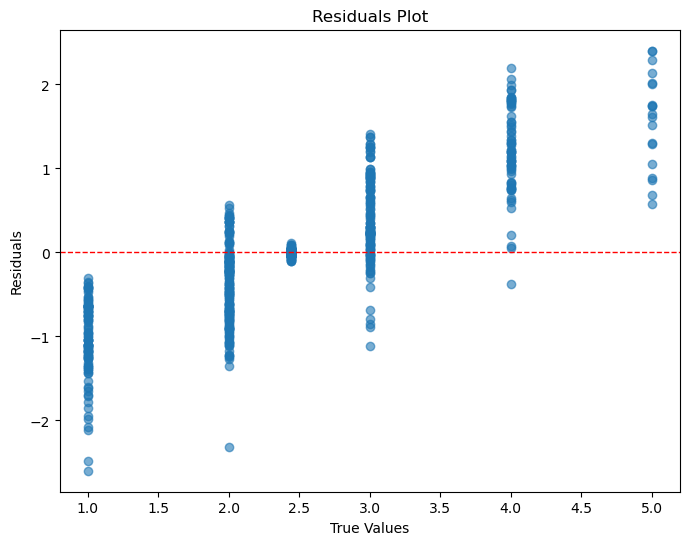

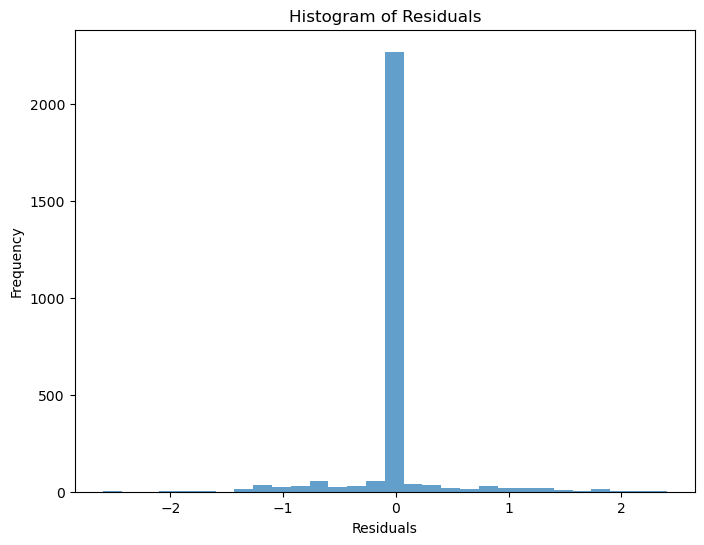

In [35]:
# Example: XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression objective
    'eval_metric': 'rmse',           # Evaluation metric
    'n_estimators': 500,             # Number of boosting rounds (trees)
    'max_depth': 6,                  # Maximum depth of trees
    'learning_rate': 0.05,           # Step size shrinkage
    'subsample': 0.8,                # Subsample ratio of training instances
    'colsample_bytree': 0.8          # Subsample ratio of columns for each tree
}

# Call the function
model = xgboost_regression(
    X=X,
    y=y,
    params=params,
    test_size=0.2,        # Use 20% of data for the test set
    eval_size=0.1,        # Use 10% of the test set for evaluation
    tree_method="hist",   # Use 'hist' for faster training
    verbose=True          # Enable verbose output during training
)

Interpretation of Results
RMSE: 0.4021:

This indicates the average prediction error in the same units as current_stress_level. Given the scale of current_stress_level (likely ranging between 1 and 5), this is a moderate error.
R²: 0.2763:

This indicates that the model explains only 27.63% of the variance in the target variable. While not very high, it is reasonable for a first attempt, given the predictors used.

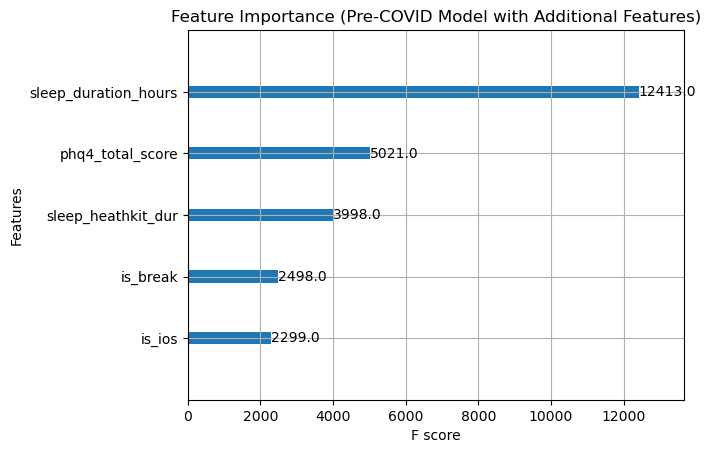

In [36]:
xgb.plot_importance(model)
plt.title("Feature Importance (Pre-COVID Model with Additional Features)")
plt.show()

## Analysis of Feature Importance
### Pre-COVID Model

#### Most Important Features:

sleep_duration_hours is by far the most influential feature, with an F-score of 12413.0, dominating the model's predictions.
phq4_total_score (5021.0) and sleep_heathkit_dur (3998.0) are moderately important, showing that mental health and alternative sleep measures contribute meaningfully.
is_break (2498.0) and is_ios (2299.0) have lower importance but still provide predictive value.
Takeaways:

Sleep metrics (sleep_duration_hours and sleep_heathkit_dur) and mental health (phq4_total_score) are strong predictors of stress levels pre-COVID, while break periods (is_break) and device type (is_ios) have less influence.

In [37]:
# Display the columns in pre_covid
print("Columns in pre_covid dataset:")
print(dur_covid.columns)

features_dur = dur_covid.columns
features_dur

Columns in pre_covid dataset:
Index(['id', 'date', 'covid_overall_concern', 'covid_activity_impact',
       'covid_behavior_change', 'covid_concern_self',
       'covid_concern_classmates', 'covid_concern_family',
       'covid_concern_supplies', 'feeling_supported',
       'social_media_usage_change', 'phq4_total_score', 'current_stress_level',
       'is_ios', 'sleep_duration_hours', 'sleep_heathkit_dur', 'is_break'],
      dtype='object')


Index(['id', 'date', 'covid_overall_concern', 'covid_activity_impact',
       'covid_behavior_change', 'covid_concern_self',
       'covid_concern_classmates', 'covid_concern_family',
       'covid_concern_supplies', 'feeling_supported',
       'social_media_usage_change', 'phq4_total_score', 'current_stress_level',
       'is_ios', 'sleep_duration_hours', 'sleep_heathkit_dur', 'is_break'],
      dtype='object')

In [38]:
# Define features and target
X = dur_covid.drop(columns=[
    'id', 
    'date', 
    'current_stress_level'
])  # Features

X['is_break'] = X['is_break'].astype(int)

y = dur_covid['current_stress_level']  # Target

X

,covid_overall_concern,covid_activity_impact,covid_behavior_change,covid_concern_self,covid_concern_classmates,covid_concern_family,covid_concern_supplies,feeling_supported,social_media_usage_change,phq4_total_score,is_ios,sleep_duration_hours,sleep_heathkit_dur,is_break
0,3.72533,4.018525,3.701283,3.021019,3.416103,3.885287,2.490381,4.125223,4.628963,4.000000,1.0,9.00,9.00,1
1,5.00000,7.000000,6.000000,6.000000,4.000000,6.000000,4.000000,2.000000,4.000000,4.000000,1.0,8.00,8.00,1
2,6.00000,5.000000,5.000000,4.000000,3.000000,5.000000,3.000000,3.000000,4.000000,4.000000,1.0,8.50,8.50,1
3,3.00000,6.000000,4.000000,3.000000,5.000000,5.000000,3.000000,3.000000,3.000000,4.000000,1.0,8.25,8.25,0
4,3.00000,4.000000,4.000000,2.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.0,8.75,8.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87519,3.72533,4.018525,3.701283,3.021019,3.416103,3.885287,2.490381,4.125223,4.628963,2.645791,1.0,7.00,7.00,0
87520,3.72533,4.018525,3.701283,3.021019,3.416103,3.885287,2.490381,4.125223,4.628963,2.645791,1.0,8.50,8.50,0
87521,3.72533,4.018525,3.701283,3.021019,3.416103,3.885287,2.490381,4.125223,4.628963,2.645791,1.0,6.75,6.75,0
87522,3.72533,4.018525,3.701283,3.021019,3.416103,3.885287,2.490381,4.125223,4.628963,2.645791,1.0,5.00,5.00,0


In [39]:
y

0        4.000000
1        3.000000
2        3.000000
3        3.000000
4        2.000000
           ...   
87519    2.647961
87520    2.647961
87521    2.647961
87522    2.647961
87523    2.647961
Name: current_stress_level, Length: 87524, dtype: float64

In [40]:
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", pd.Series(y).isnull().sum())

Missing values in X: 0
Missing values in y: 0


Training set size: 70019
Validation set size: 15316
Test set size: 2189
RMSE: 0.3318
R²: 0.2937


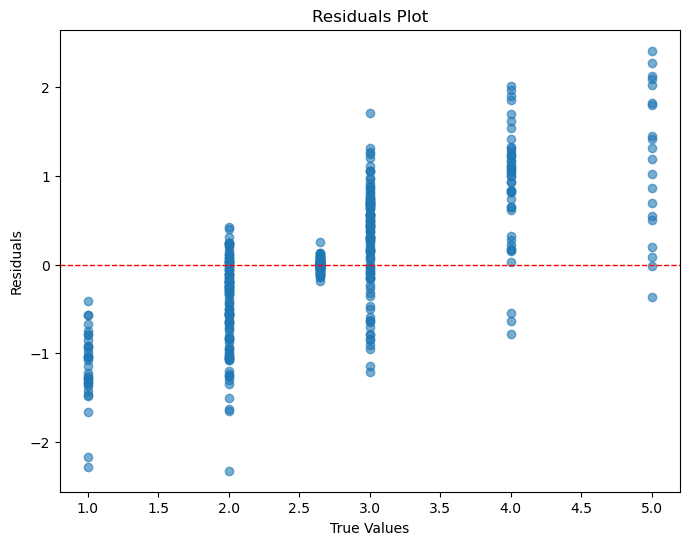

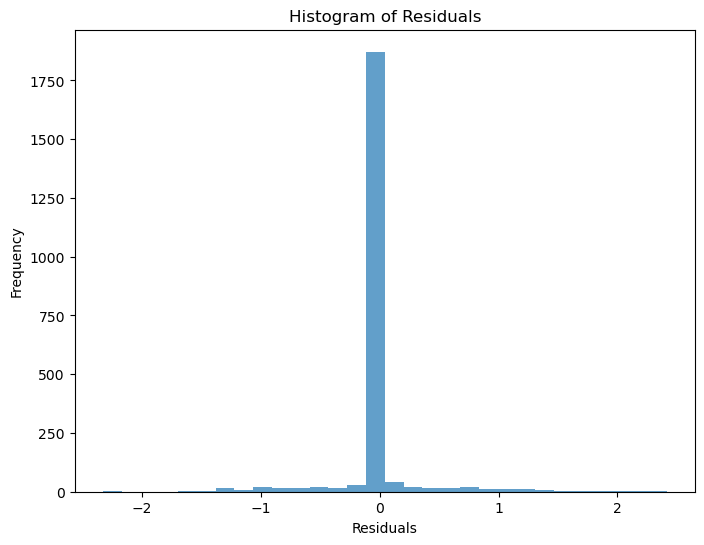

In [41]:
# Example: XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression objective
    'eval_metric': 'rmse',           # Evaluation metric
    'n_estimators': 500,             # Number of boosting rounds (trees)
    'max_depth': 6,                  # Maximum depth of trees
    'learning_rate': 0.05,           # Step size shrinkage
    'subsample': 0.8,                # Subsample ratio of training instances
    'colsample_bytree': 0.8          # Subsample ratio of columns for each tree
}

# Call the function
model = xgboost_regression(
    X=X,
    y=y,
    params=params,
    test_size=0.2,        # Use 20% of data for the test set
    eval_size=0.1,        # Use 10% of the test set for evaluation
    tree_method="hist",   # Use 'hist' for faster training
    verbose=True          # Enable verbose output during training
)

### Insights:

Compared to the pre covid results, the during covid lower RMSE indicates better predictive accuracy. The additional features and parameter adjustments have contributed to this improvement.
R² Is Still Modest:

A score of ~0.29 suggests the model is capturing some patterns in the data but has room for improvement. This could mean:
Missing predictive features.
Non-linear relationships that the current model setup may not fully capture.
Variability in the target variable influenced by unmeasured external factors.

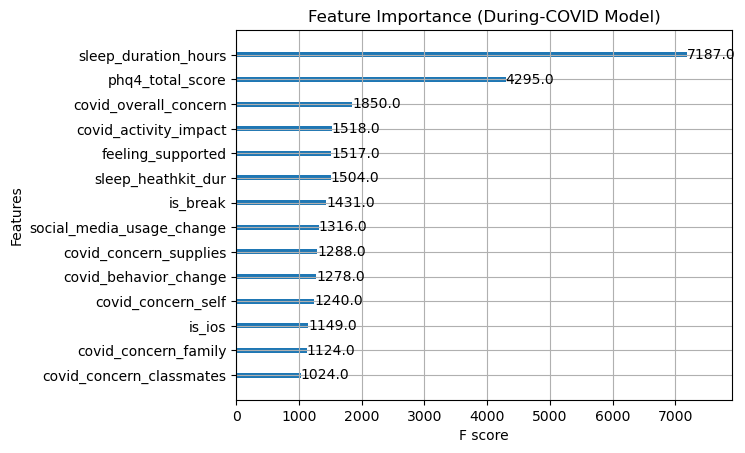

In [42]:
xgb.plot_importance(model)
plt.title("Feature Importance (During-COVID Model)")
plt.show()

## During-COVID Model
### Most Important Features:

sleep_duration_hours (7187.0) and phq4_total_score (4295.0) remain the top predictors, emphasizing the consistent impact of sleep and mental health on stress during COVID.
covid_overall_concern (1850.0), covid_activity_impact (1518.0), and feeling_supported (1517.0) have significant influence, reflecting COVID-specific stressors and perceived support.
Other COVID-related features (e.g., social_media_usage_change, covid_behavior_change, and covid_concern_* columns) also contribute to the model but to a lesser extent.
Takeaways:

During COVID, stress levels are influenced not only by sleep and mental health but also by specific concerns and behaviors related to the pandemic (e.g., concerns about activities, supplies, and classmates).

### Comparison Between Pre- and During-COVID Models
Sleep and Mental Health:

Consistently the most important predictors in both models.
However, their relative importance decreases slightly during COVID as pandemic-specific stressors gain influence.
Pandemic-Specific Features:

Features like covid_overall_concern, covid_activity_impact, and feeling_supported emerge as significant predictors during COVID but are irrelevant in the pre-COVID model.
Break Periods and Device Usage:

is_break and is_ios are less important in both cases, indicating they contribute little to stress prediction.